# 客戶統計分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xls = pd.ExcelFile("../data/帳戶schema.xlsx")
Onshore= xls.parse(1)
Offshore = xls.parse(3)
Omnibus = xls.parse(5)

## Onshore

In [3]:
OnshoreP = Onshore[Onshore.beneficiariestype == "個人(自然人)"]
OnshoreP.head()

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,agentcode,agentname,institutioncode,institutionname,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,311710,NaN,700XXXX,郵局代銷,SEC00TEAM1,TＯam1 SE,NaN,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,R001155043,林Ｏ慧,CY603,CY603,A0567,周Ｏ賢,NaN,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,NaN,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,A0715,郭Ｏ展,D4120,台中分公司,A0715,郭Ｏ展,NaN,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,A0288,龔Ｏ銘,D4120,台中分公司,A0288,龔Ｏ銘,NaN,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0


In [4]:
def new_city(x):
    x=x[:3]
    new=["新北市","桃園市","台中市","高雄市","台南市"]
    old = ["台北縣","桃園縣","台中縣","高雄縣","台南縣"]
    if x in old:
        return new[old.index(x)]
    else:
        return x
def city_group(x):
    city = {"北部":["台北市","新北市","基隆市","新竹市","桃園市","新竹縣"],"中部":["台中市","苗栗縣","彰化縣","南投縣","雲林縣"],
            "南部":["高雄市","台南市","嘉義市","嘉義縣","屏東縣","澎湖縣"],"東部":["宜蘭縣","花蓮縣","台東縣"]}
    for area in city:
        if x in city[area]:
            return area
#AGE
OnshoreP["age"] = pd.to_datetime(OnshoreP['birthdate'].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)
#location
OnshoreP["location"] = OnshoreP.address1_line1.apply(new_city)
#area
OnshoreP["area"] =  OnshoreP.location.apply(city_group)
#ageseperate
a = []
for x in OnshoreP["age"] :
    if x<=20:
        a.append("20lower") 
    elif x>20 and x<=30:
        a.append("20-30") 
    elif x>30 and x<=40:
        a.append("30-40") 
    elif x>40 and x<=50:
        a.append("40-50")
    elif x>50 and x<=60:
        a.append("50-60") 
    elif x>60:
        a.append("60up")
OnshoreP["age_group"] = a


OnshoreP.head()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,SEC00TEAM1,TＯam1 SE,NaN,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9,41,新北市,北部,40-50
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,A0567,周Ｏ賢,NaN,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF,24,嘉義縣,南部,20-30
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,LF00000001,壽Ｏ通路投信,NaN,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F,26,基隆市,北部,20-30
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,A0715,郭Ｏ展,NaN,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC,53,彰化縣,中部,50-60
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,A0288,龔Ｏ銘,NaN,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0,48,台中市,中部,40-50


## 1. 先觀察只用傳真交易的客戶

In [5]:
faxonly = OnshoreP[(OnshoreP["faxtransaction"] == "Y") & (OnshoreP["webtransaction"] == "N")]
faxonly

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,SEC00TEAM1,TＯam1 SE,NaN,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9,41,新北市,北部,40-50
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,A0715,郭Ｏ展,NaN,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC,53,彰化縣,中部,50-60
9,2017-09-08,318271,1219208,陳ＯＯ,E224******,1996-10-28,F,臺灣,個人(自然人),07XX83385,...,A0776,李Ｏ雯,NaN,NaN,2017-09-11 10:40:29.807,9038A160-3957-38F4-A423-D115D3AA4244,22,高雄市,南部,20-30
13,2017-08-30,318239,1219506,李ＯＯ,R123******,1985-11-12,M,臺灣,個人(自然人),06XX00562,...,A0367,劉Ｏ邑,NaN,NaN,2017-11-16 17:31:10.993,D5AAB425-57CA-5BF2-067F-345B8F71FDE8,33,台南市,南部,30-40
14,2017-08-31,318248,1219515,鄭ＯＯ,R123******,1987-06-15,M,臺灣,個人(自然人),06XX00562,...,A0367,劉Ｏ邑,NaN,NaN,2017-09-01 10:22:09.313,4CD49FD1-1DB4-1CC2-CD7E-152D1AA9680B,31,台南市,南部,30-40
17,2017-08-15,318183,1219452,梁ＯＯ,H222******,1984-08-29,F,臺灣,個人(自然人),NaN,...,A0532,黃Ｏ盈,NaN,NaN,2017-08-17 08:56:56.297,BCA9235F-701A-6302-867A-E00A088F34F8,34,台北市,北部,30-40
19,2017-08-24,318222,1219490,戴ＯＯ,R122******,1973-12-20,M,臺灣,個人(自然人),06XX22171,...,A0639,宋Ｏ玫,NaN,NaN,2017-09-26 16:30:52.477,410C239F-8403-3170-BBF3-F2113AF360E2,45,台南市,南部,40-50
27,2005-12-01,270255,1172201,王ＯＯ,N121******,1967-08-20,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2009-07-10 17:17:04.573,796FB850-D3BF-5D48-ADE6-DC402AF24FAE,51,彰化縣,中部,50-60
46,2017-08-17,318199,1219467,廖ＯＯ,K200******,1939-04-20,F,臺灣,個人(自然人),02XX358552,...,RCAM1,RＯAM,NaN,NaN,2017-08-18 10:04:48.980,A8C36A34-0F60-3777-6E12-C42C9BC44A3A,79,台北市,北部,60up
54,2017-08-21,318210,1219478,吳ＯＯ,R223******,1987-04-08,F,臺灣,個人(自然人),06XX52800,...,RCAM1,RＯAM,NaN,NaN,2017-08-22 10:11:06.423,52AC3EAC-2B26-5FF0-02CA-3726A8163F3C,31,台南市,南部,30-40


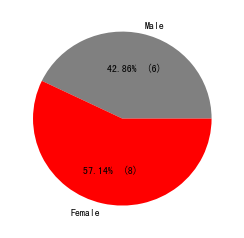

In [6]:
plt.figure(figsize=plt.figaspect(1))
values = [len(faxonly[faxonly.gendercode=="M"]),len(faxonly[faxonly.gendercode=="F"])] 
labels = ["Male","Female"] 
c = ["gray","red"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values), colors= c)
plt.show()

#### 只有傳真交易的客戶男女比例上無太大差別

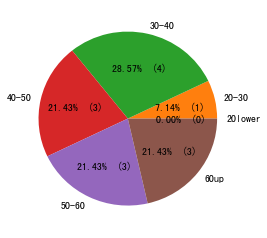

In [7]:
plt.figure(figsize=plt.figaspect(1))
values = [len(faxonly[faxonly.age_group=="20lower"]), len(faxonly[faxonly.age_group=="20-30"]), len(faxonly[faxonly.age_group=="30-40"]), len(faxonly[faxonly.age_group=="40-50"]), len(faxonly[faxonly.age_group=="50-60"]), len(faxonly[faxonly.age_group=="60up"])] 
labels = ["20lower","20-30","30-40","40-50","50-60","60up"] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

#### 只有傳真交易的客戶年齡分布上也蠻平均的

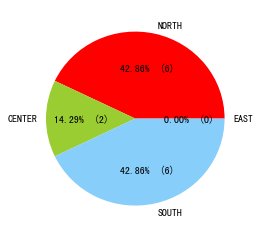

In [8]:
plt.figure(figsize=plt.figaspect(1))
values = [len(faxonly[faxonly.area=="北部"]), len(faxonly[faxonly.area=="中部"]), len(faxonly[faxonly.area=="南部"]), len(faxonly[faxonly.area=="東部"])] 
labels = ["NORTH","CENTER","SOUTH","EAST"] 
c = ['red','yellowgreen','lightskyblue','gold']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values), colors=c)
plt.show()

#### 只有傳真交易的客戶地理分布上偏向北部與南部，東部則是沒有

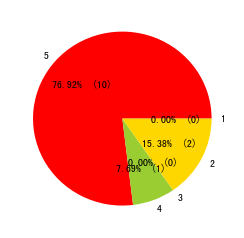

In [9]:
plt.figure(figsize=plt.figaspect(1))
values = [len(faxonly[faxonly.assessmentrisk == 5]), len(faxonly[faxonly.assessmentrisk == 4]),len(faxonly[faxonly.assessmentrisk == 3]),len(faxonly[faxonly.assessmentrisk == 2]),len(faxonly[faxonly.assessmentrisk == 1])] 
labels = ["5","4","3","2","1"] 
c = ['red','yellowgreen','lightskyblue','gold']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values), colors=c)
plt.show()

#### 只有傳真交易的客戶適性風險評估幾乎都是5，有一位是4、兩位是2

## 2. 觀察只用網路下單的客戶

In [10]:
webonly = OnshoreP[(OnshoreP["faxtransaction"] == "N") & (OnshoreP["webtransaction"] == "Y")]
webonly

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
80,2017-09-06,318260,1219526,陳ＯＯ,F203******,1955-01-21,F,臺灣,個人(自然人),02XX256674,...,A0769,張Ｏ臻,NaN,NaN,2017-09-13 17:16:32.873,B6BD24D2-4C9D-A07B-0155-599B45C11522,63,新北市,北部,60up


#### 只有一位住在新北市的63歲女性，這個結果似乎與一般常理理解不同

## 3. 觀察兩者皆使用的客戶

In [11]:
both = OnshoreP[(OnshoreP["faxtransaction"] == "Y") & (OnshoreP["webtransaction"] == "Y")]
both

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,A0567,周Ｏ賢,NaN,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF,24,嘉義縣,南部,20-30
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,LF00000001,壽Ｏ通路投信,NaN,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F,26,基隆市,北部,20-30
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,A0288,龔Ｏ銘,NaN,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0,48,台中市,中部,40-50
10,2017-08-16,318188,1219456,吳ＯＯ,H221******,1969-09-27,F,臺灣,個人(自然人),NaN,...,A0642,吳Ｏ麗,NaN,NaN,2017-08-17 08:57:50.553,05B394EE-CA20-BF66-B5EF-683270E2B181,49,高雄市,南部,40-50
11,2017-08-16,318191,1219459,鍾ＯＯ,T100******,1932-01-27,M,臺灣,個人(自然人),06XX16601,...,A0367,劉Ｏ邑,NaN,NaN,2017-08-17 09:00:00.253,D1E820E0-D502-61F6-C50D-CA1283953FFF,86,台南市,南部,60up
12,2017-08-24,318223,1219491,周ＯＯ,C120******,1962-02-15,M,臺灣,個人(自然人),NaN,...,A0642,吳Ｏ麗,NaN,NaN,2017-11-16 17:31:10.993,E5BD671A-D976-44E7-BC54-7ADD4F30ECBE,56,高雄市,南部,50-60
15,2017-09-06,318261,1219527,李ＯＯ,R201******,1954-12-04,F,臺灣,個人(自然人),07XX29814,...,A0776,李Ｏ雯,NaN,NaN,2017-09-07 09:29:18.250,B348A505-06A5-AE5A-2E61-6F9E68F15DE4,64,高雄市,南部,60up
16,2017-09-08,318272,1219209,林ＯＯ,A223******,1975-10-08,F,臺灣,個人(自然人),NaN,...,A0278,黃Ｏ智,NaN,NaN,2017-09-11 11:02:10.717,AE0436F1-1B6B-320E-E6F1-AF49929C8577,43,台北市,北部,40-50
18,2017-08-16,318196,1219464,莫ＯＯ,U220******,1973-10-08,F,臺灣,個人(自然人),NaN,...,A0532,黃Ｏ盈,NaN,NaN,2018-01-26 19:18:28.317,4048B7DC-41C0-5AD3-F032-35D472C98193,45,新北市,北部,40-50
20,2017-08-29,318235,1219503,洪ＯＯ,N120******,1965-07-19,M,臺灣,個人(自然人),02XX155378,...,A0780,梁Ｏ文,NaN,NaN,2018-02-07 17:28:31.960,D324C2DA-FE7E-A02C-7085-E437770BBD57,53,台北市,北部,50-60


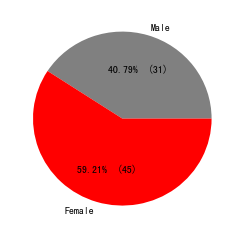

In [12]:
plt.figure(figsize=plt.figaspect(1))
values = [len(both[both.gendercode=="M"]),len(both[both.gendercode=="F"])] 
labels = ["Male","Female"] 
c = ["gray","red"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values), colors= c)
plt.show()

#### 男女比例上也無太大區別

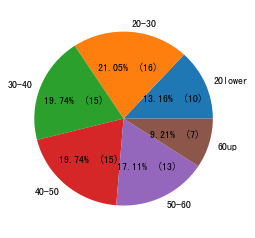

In [13]:
plt.figure(figsize=plt.figaspect(1))
values = [len(both[both.age_group=="20lower"]), len(both[both.age_group=="20-30"]), len(both[both.age_group=="30-40"]), len(both[both.age_group=="40-50"]), len(both[both.age_group=="50-60"]), len(both[both.age_group=="60up"])] 
labels = ["20lower","20-30","30-40","40-50","50-60","60up"] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

#### 在年齡分布上也很平均

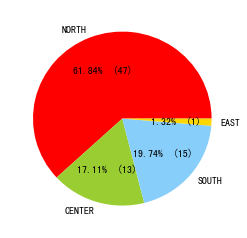

In [14]:
plt.figure(figsize=plt.figaspect(1))
values = [len(both[both.area=="北部"]), len(both[both.area=="中部"]), len(both[both.area=="南部"]), len(both[both.area=="東部"])] 
labels = ["NORTH","CENTER","SOUTH","EAST"] 
c = ['red','yellowgreen','lightskyblue','gold']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values), colors=c)
plt.show()

#### 主要集中在北部

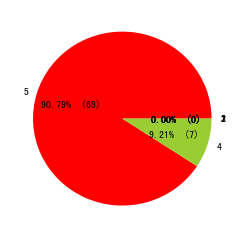

In [15]:
plt.figure(figsize=plt.figaspect(1))
values = [len(both[both.assessmentrisk == 5]), len(both[both.assessmentrisk == 4]),len(both[both.assessmentrisk == 3]),len(both[both.assessmentrisk == 2]),len(both[both.assessmentrisk == 1])] 
labels = ["5","4","3","2","1"] 
c = ['red','yellowgreen','lightskyblue','gold']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
plt.pie(values, labels=labels, autopct=make_autopct(values), colors=c)
plt.show()

#### 風險評估統計主要也是5

## 4. 觀察兩者皆不使用的客戶（那他用什麼？

In [16]:
none = OnshoreP[(OnshoreP["faxtransaction"] == "N") & (OnshoreP["webtransaction"] == "N")]
none

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
26,2005-06-13,268535,1169957,范ＯＯ,B200******,1900-01-01,F,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2009-07-10 17:17:04.573,CD54DBF7-3CE9-D5A0-4C80-6A6123DC6707,118,新北市,北部,60up
58,2017-08-22,318214,1219482,曾ＯＯ,N122******,1975-08-26,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2017-08-23 11:06:50.947,4E0584C8-7D8B-1237-2950-B7DC51D7EB60,43,苗栗縣,中部,40-50
83,2017-09-07,318264,1219530,游ＯＯ,F122******,1962-03-11,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2017-09-08 09:43:17.970,C44C86D7-5D02-1628-0B3D-7D8FF5A2C426,56,新北市,北部,50-60


#### 有三位兩者都不使用的朋友，且這三位的 Sales 都是ROAM！
#### 來看一下 ROAM 的客戶

In [17]:
RCAM1 = OnshoreP[(OnshoreP["salescode"] == "RCAM1")]
RCAM1

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
26,2005-06-13,268535,1169957,范ＯＯ,B200******,1900-01-01,F,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2009-07-10 17:17:04.573,CD54DBF7-3CE9-D5A0-4C80-6A6123DC6707,118,新北市,北部,60up
27,2005-12-01,270255,1172201,王ＯＯ,N121******,1967-08-20,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2009-07-10 17:17:04.573,796FB850-D3BF-5D48-ADE6-DC402AF24FAE,51,彰化縣,中部,50-60
46,2017-08-17,318199,1219467,廖ＯＯ,K200******,1939-04-20,F,臺灣,個人(自然人),02XX358552,...,RCAM1,RＯAM,NaN,NaN,2017-08-18 10:04:48.980,A8C36A34-0F60-3777-6E12-C42C9BC44A3A,79,台北市,北部,60up
54,2017-08-21,318210,1219478,吳ＯＯ,R223******,1987-04-08,F,臺灣,個人(自然人),06XX52800,...,RCAM1,RＯAM,NaN,NaN,2017-08-22 10:11:06.423,52AC3EAC-2B26-5FF0-02CA-3726A8163F3C,31,台南市,南部,30-40
58,2017-08-22,318214,1219482,曾ＯＯ,N122******,1975-08-26,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2017-08-23 11:06:50.947,4E0584C8-7D8B-1237-2950-B7DC51D7EB60,43,苗栗縣,中部,40-50
60,2017-08-23,318216,1219484,王ＯＯ,Y100******,1947-03-26,M,臺灣,個人(自然人),02XX929052,...,RCAM1,RＯAM,NaN,NaN,2017-08-24 10:11:58.743,5621738B-9D57-E829-21EE-6E2BAE412ACD,71,台北市,北部,60up
67,2017-08-28,318230,1219498,林ＯＯ,P202******,1952-08-05,F,臺灣,個人(自然人),07XX06476,...,RCAM1,RＯAM,NaN,NaN,2017-08-30 09:11:29.940,0E503FC2-AD75-3C41-1F72-EC0FA4CFC727,66,高雄市,南部,60up
83,2017-09-07,318264,1219530,游ＯＯ,F122******,1962-03-11,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2017-09-08 09:43:17.970,C44C86D7-5D02-1628-0B3D-7D8FF5A2C426,56,新北市,北部,50-60


In [18]:
risk2 = OnshoreP[(OnshoreP["assessmentrisk"] == 2)]
risk2

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
46,2017-08-17,318199,1219467,廖ＯＯ,K200******,1939-04-20,F,臺灣,個人(自然人),02XX358552,...,RCAM1,RＯAM,NaN,NaN,2017-08-18 10:04:48.980,A8C36A34-0F60-3777-6E12-C42C9BC44A3A,79,台北市,北部,60up
67,2017-08-28,318230,1219498,林ＯＯ,P202******,1952-08-05,F,臺灣,個人(自然人),07XX06476,...,RCAM1,RＯAM,NaN,NaN,2017-08-30 09:11:29.940,0E503FC2-AD75-3C41-1F72-EC0FA4CFC727,66,高雄市,南部,60up
83,2017-09-07,318264,1219530,游ＯＯ,F122******,1962-03-11,M,臺灣,個人(自然人),NaN,...,RCAM1,RＯAM,NaN,NaN,2017-09-08 09:43:17.970,C44C86D7-5D02-1628-0B3D-7D8FF5A2C426,56,新北市,北部,50-60


#### 風險評估 2 的也都是由 ROAM 賣出 (ROAM不知道是什麼單位)

In [19]:
OnshoreP.to_csv('OnshoreP.csv', index = False, encoding = "big5")

# 雷達圖

## Onshore整理出 投資年資、星座、地區收入 

In [20]:
OnshoreP.head()

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area,age_group
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,SEC00TEAM1,TＯam1 SE,NaN,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9,41,新北市,北部,40-50
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,A0567,周Ｏ賢,NaN,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF,24,嘉義縣,南部,20-30
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,LF00000001,壽Ｏ通路投信,NaN,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F,26,基隆市,北部,20-30
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,A0715,郭Ｏ展,NaN,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC,53,彰化縣,中部,50-60
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,A0288,龔Ｏ銘,NaN,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0,48,台中市,中部,40-50


In [21]:
## 投資年資
OnshoreP["investage"] = pd.to_datetime(OnshoreP["accountdate"].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)

## 星座
def get_star(month, date):
    dates = (21, 20, 21, 21, 22, 22, 23, 24, 24, 24, 23, 22)
    constellations = ("摩羯", "水瓶", "雙魚", "牡羊", "金牛", "雙子", "巨蟹", "獅子", "處女", "天秤", "天蝎", "射手", "摩羯")
    if date < dates[month-1]:
        return constellations[month-1]
    else:
        return constellations[month]

month = pd.DatetimeIndex(OnshoreP["birthdate"]).month
day = pd.DatetimeIndex(OnshoreP["birthdate"]).day

a = []
for x, y in zip(month, day) :
    a.append(get_star(x, y))
OnshoreP["star"] = a

#### 將星座分成土、火、風、水四象
a=[]
for i in OnshoreP["star"] :
    if i == "摩羯" or i == "金牛" or i == "處女" :
        a.append("土")
    elif i == "牡羊" or i == "獅子" or i == "射手" :
        a.append("火")
    elif i == "天秤" or i == "水瓶" or i == "雙子" :
        a.append("風")
    elif i == "巨蟹" or i == "天蝎" or i == "雙魚" :
        a.append("水")
OnshoreP["sign"] = a

## 地區收入
#### 綜合所得稅資料來源(https://paytax.nat.gov.tw/TAXRPT_N_City.aspx?TAXOPT=A&PAYMENT_TYPE345=)
url = 'https://paytax.nat.gov.tw/TAXRPT_N_City.aspx?TAXOPT=A&PAYMENT_TYPE345='
table = pd.read_html(url, encoding = "utf-8")[2]
citytax = table[[1, 2, 3, 4, 5, 9, 10]]
citytax = citytax.drop([0,1,3,5,15,21,28,29])
citytax[1][2] = "台北市"
citytax[1][20] = "台中市"
citytax[1][25] = "台東縣"
citytax[1][26] = "台南市"

citytax

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

,1,2,3,4,5,9,10
2,台北市,7573,360140599,5148,541408617,201308.0,3.300830e+10
4,高雄市,6042,139555633,2900,99591334,110675.0,6.133613e+09
6,宜蘭縣,1053,18314394,473,8322809,13347.0,4.531378e+08
7,花蓮縣,624,10615160,285,5699501,8954.0,3.007570e+08
8,金門縣,412,6952076,247,5448109,7899.0,2.872960e+08
9,桃園市,6464,153415315,3618,195031431,103697.0,4.853576e+09
10,基隆市,931,15526201,463,13536589,17621.0,5.521574e+08
11,連江縣,46,763164,32,668124,861.0,2.769290e+07
12,新北市,11155,290923170,6489,277182299,223458.0,1.214941e+10
13,新竹市,1575,103876724,926,101396226,31483.0,4.388847e+09


In [32]:
cities_tax = {"台北市": 158435.7774, "新北市" :52747.43433, "基隆市": 30566.40242, "新竹市": 135184.7952, 
          "桃園市": 45720.41121, "新竹縣": 100692.2967, "台中市": 70383.46879, "苗栗縣": 36878.81204,
          "彰化縣": 55319.74742, "南投縣": 37274.06195, "雲林縣": 35105.36411, "高雄市": 53276.37147,
          "台南市": 62357.87688, "嘉義市": 49092.92192, "嘉義縣": 29288.25251, "屏東縣": 29157.5343, 
          "宜蘭縣": 32258.12082, "花蓮縣": 32147.58948, "台東縣": 37918.1895, "金門縣": 35019.42346, "澎湖縣": 31381.24106}

def get_tax_point(tax):
    # max_tax is magic number...
    max_tax = 130000
    min_tax = 29157
    
    if tax > max_tax:
        return 5
    elif tax < min_tax:
        return 0
    else:
        scale = 5/(max_tax - min_tax)
        convert = ((tax - min_tax) * scale)
        return round(convert, 2)

print(get_tax_point(54771.71871285714))
print(get_tax_point(73499.39301563833))
print(get_tax_point(100638.12873756081))

1.27
2.2
3.54


,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,ownerid,updatedate,DMID,age,location,area,age_group,investage,star,sign
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9,41,新北市,北部,40-50,1,處女,土
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF,24,嘉義縣,南部,20-30,1,水瓶,風
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F,26,基隆市,北部,20-30,1,射手,火
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC,53,彰化縣,中部,50-60,1,摩羯,土
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0,48,台中市,中部,40-50,1,雙魚,水


In [34]:
OnshoreP.to_csv("OnshorePP.csv", encoding = "big5")
satrs = OnshoreP['star'].value_counts()
satrs

天秤    12
天蝎    10
牡羊    10
射手     9
水瓶     8
處女     8
巨蟹     8
雙子     8
獅子     7
雙魚     6
摩羯     5
金牛     3
Name: star, dtype: int64

In [24]:
city_count = OnshoreP['location'].value_counts()
cities = city_count.index
values = city_count.values
taxes = []
for i in range(len(cities)):
    try:
        aver_tax = cities_tax[cities[i]]
    except:
        continue
    list = [aver_tax]*values[i]
    taxes = taxes + list

# 平均稅收
onshore_tax = sum(taxes)/len(taxes)
onshore_tax_point = get_tax_point(onshore_tax)
onshore_tax_point

2.2

## Onshore 雷達圖

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


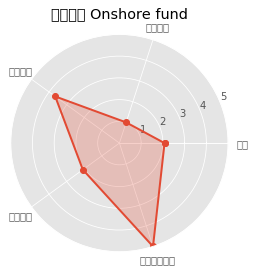

In [37]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 使用ggplot的绘图风格
plt.style.use('ggplot')

# 构造数据
#### 年齡部分平均數、眾數、中位數都是41.多，就拿中位數41.5 然後處以10變4.15
#### 投資年資這筆資料開戶幾乎全部都在2017年，都是 1
#### 風險承受評估也是幾乎全部都在 5
#### 地區收入依照各縣市稅收排名取中位數為 高雄市
#### 星座理財排名依序是 金牛、處女、魔羯、天蠍、射手、雙魚、雙子、天秤、牡羊、巨蟹、水瓶、獅子 最會到最不會
#### 選出現最多次的天秤座
values = [2.075, 1, 3.65, 2.08, 5]
feature = ["年齡", "投資年資", "地區收入", "星座理財", "風險承受評估"]

N = len(values)
# 设置雷达图的角度，用于平分切开一个圆面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

# 为了使雷达图一圈封闭起来，需要下面的步骤
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure()
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2)
# 填充颜色
ax.fill(angles, values, alpha=0.25)
# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, feature)
# 设置雷达图的范围
ax.set_ylim(0,5)
# 添加标题
plt.title("國內基金 Onshore fund")
# 添加网格线
ax.grid(True)
# 显示图形
plt.savefig("Onshorefund.png")
plt.show()

## Offshore整理出 年齡、投資年資、投資年紀、星座、地區收入

In [38]:
#有一行生日是nan，要移除
#Delete row with dummy value
Offshore = Offshore.dropna(subset=['birthdate'])
Offshore.head()

,accountnumber,accountid,identifycode,gendercode,birthdate,accountname,englishlastname,englishfirstname,telephone1,telephone2,...,ownerid,accountdate,updatedate,DMID,age,location,area,investage,ageinvesage,star
0,3158,936077,A222******,F,1965-03-31,林Ｏ柔 ...,...,PEI-JOU ...,,,...,NaN,1996-11-11,2006-02-08,CCD01D2C-A0BB-0150-B56C-A16543C78D61,53,新北市,北部,22.0,31.0,牡羊
1,40,1046036,G120******,M,1958-11-18,楊Ｏ宗 ...,...,YIN-TSUNG ...,,,...,NaN,2000-01-14,2006-02-08,6FCBE594-8DA6-AC31-A42A-237DC7F56816,60,台北市,北部,18.0,42.0,天蝎
2,3093,1069189,A127******,M,1966-11-22,孫Ｏ傑 ...,...,YING-CHIEH ...,,,...,NaN,1996-10-16,2015-05-29,7BBFBC22-C799-26D8-1EED-A7490ECFD156,52,台北市,北部,22.0,30.0,天蝎
3,3145,1080213,A102******,M,1947-11-20,徐Ｏ堯 ...,...,YONG-YAO ...,,,...,NaN,1996-11-04,2015-05-26,15FB3270-AD0A-BDB1-D4C5-7037120D2A6D,71,台北市,北部,22.0,49.0,天蝎
4,131,1226301,D220******,M,1956-07-12,陳Ｏ英 ...,...,YUN-YIN ...,,,...,NaN,2000-02-23,2000-02-23,853AD3BA-0983-B0AA-DFE4-2AB291C392B2,62,台北市,北部,18.0,44.0,巨蟹


In [39]:
def new_city(x):
    x=x[:3]
    new=["新北市","桃園市","台中市","高雄市","台南市", "台中市"]
    old = ["台北縣","桃園縣","台中縣","高雄縣","台南縣", '臺中市']
    if x in old:
        return new[old.index(x)]
    else:
        return x
def city_group(x):
    city = {"北部":["台北市","新北市","基隆市","新竹市","桃園市","新竹縣"],"中部":["台中市","苗栗縣","彰化縣","南投縣","雲林縣"],
            "南部":["高雄市","台南市","嘉義市","嘉義縣","屏東縣","澎湖縣"],"東部":["宜蘭縣","花蓮縣","台東縣"]}
    for area in city:
        if x in city[area]:
            return area
#AGE
Offshore["age"] = pd.to_datetime(Offshore['birthdate'].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)
#location
Offshore["location"] = Offshore.address1_composite.apply(new_city)
#area
Offshore["area"] =  Offshore.location.apply(city_group)

## 投資年資
Offshore["investage"] = pd.to_datetime(Offshore["accountdate"].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)

## 投資年紀
Offshore["ageinvesage"] = Offshore["age"] - Offshore["investage"]

## 星座
def get_star(month, date):
    dates = (21, 20, 21, 21, 22, 22, 23, 24, 24, 24, 23, 22)
    constellations = ("摩羯", "水瓶", "雙魚", "牡羊", "金牛", "雙子", "巨蟹", "獅子", "處女", "天秤", "天蝎", "射手", "摩羯")
    if date < dates[month-1]:
        return constellations[month-1]
    else:
        return constellations[month]

month = pd.DatetimeIndex(Offshore["birthdate"]).month
day = pd.DatetimeIndex(Offshore["birthdate"]).day
for i in month:
    int(i)
for i in day:
    int(i)
a = []
for x, y in zip(month, day) :
    a.append(get_star(x, y))
Offshore["star"] = a

In [40]:
Offshore.head()

,accountnumber,accountid,identifycode,gendercode,birthdate,accountname,englishlastname,englishfirstname,telephone1,telephone2,...,ownerid,accountdate,updatedate,DMID,age,location,area,investage,ageinvesage,star
0,3158,936077,A222******,F,1965-03-31,林Ｏ柔 ...,...,PEI-JOU ...,,,...,NaN,1996-11-11,2006-02-08,CCD01D2C-A0BB-0150-B56C-A16543C78D61,53,新北市,北部,22.0,31.0,牡羊
1,40,1046036,G120******,M,1958-11-18,楊Ｏ宗 ...,...,YIN-TSUNG ...,,,...,NaN,2000-01-14,2006-02-08,6FCBE594-8DA6-AC31-A42A-237DC7F56816,60,台北市,北部,18.0,42.0,天蝎
2,3093,1069189,A127******,M,1966-11-22,孫Ｏ傑 ...,...,YING-CHIEH ...,,,...,NaN,1996-10-16,2015-05-29,7BBFBC22-C799-26D8-1EED-A7490ECFD156,52,台北市,北部,22.0,30.0,天蝎
3,3145,1080213,A102******,M,1947-11-20,徐Ｏ堯 ...,...,YONG-YAO ...,,,...,NaN,1996-11-04,2015-05-26,15FB3270-AD0A-BDB1-D4C5-7037120D2A6D,71,台北市,北部,22.0,49.0,天蝎
4,131,1226301,D220******,M,1956-07-12,陳Ｏ英 ...,...,YUN-YIN ...,,,...,NaN,2000-02-23,2000-02-23,853AD3BA-0983-B0AA-DFE4-2AB291C392B2,62,台北市,北部,18.0,44.0,巨蟹


In [41]:
off_satrs = Offshore['star'].value_counts()
off_satrs

天秤    15
天蝎    13
水瓶    11
摩羯    10
雙魚     9
射手     8
巨蟹     8
牡羊     7
獅子     7
金牛     5
處女     4
雙子     2
Name: star, dtype: int64

In [42]:
off_city_count = Offshore['location'].value_counts()
off_cities = off_city_count.index
off_values = off_city_count.values
off_taxes = []
for i in range(len(off_cities)):
    print(off_cities[i])
    print(off_values[i])
    
    try:
        aver_tax = cities_tax[off_cities[i]]
    except:
        continue
    list = [aver_tax]*off_values[i]
    off_taxes = off_taxes + list

# 平均稅收
offshore_tax = sum(off_taxes)/len(off_taxes)
offshore_tax_point = get_tax_point(offshore_tax)
offshore_tax_point

台北市
33
新北市
13
高雄市
12
桃園市
9
新竹市
5
台中市
4
台南市
3
KHD
2
彰化縣
2
屏東市
2
安泰心
1
TND
1
寶來投
1
TY1
1
TP2
1
花蓮市
1
康和投
1
服務推
1
ATT
1
臺南市
1
TP7
1
宜蘭縣
1
ILD
1
NT1
1


3.54

## Offshore 雷達圖

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


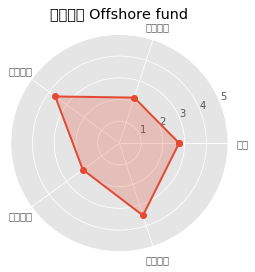

In [30]:
# 构造数据
#### 年齡部分平均數 54.9 中位數56，取平均數 54.9 然後 等比例從1~100換成1~5
#### 投資年資這筆資料幾乎全部都在 22
#### 地區收入依照各縣市稅收排名取中位數為 高雄市
#### 星座理財排名依序是 金牛、處女、魔羯、天蠍、射手、雙魚、雙子、天秤、牡羊、巨蟹、水瓶、獅子 最會到最不會
#### 選出現最多次的天秤座
#### 投資年紀平均數為34.1、中位數為35，取中位數
values = [2.745, 2.2, 3.54, 2.08, 3.5]
feature = ["年齡", "投資年資", "地區收入", "星座理財", "投資年紀"]

N = len(values)
# 设置雷达图的角度，用于平分切开一个圆面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

# 为了使雷达图一圈封闭起来，需要下面的步骤
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure()
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2)
# 填充颜色
ax.fill(angles, values, alpha=0.25)
# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, feature)
# 设置雷达图的范围
ax.set_ylim(0,5)
# 添加标题
plt.title("國外基金 Offshore fund")
# 添加网格线
ax.grid(True)
# 显示图形
plt.savefig("Offshorefund.png")
plt.show()